<a href="https://colab.research.google.com/github/datasriram/task-2-netflix-eda/blob/main/netflix_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Exploratory Data Analysis (EDA) on Netflix Dataset

(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing Values:
show_id            0
type               0
title 

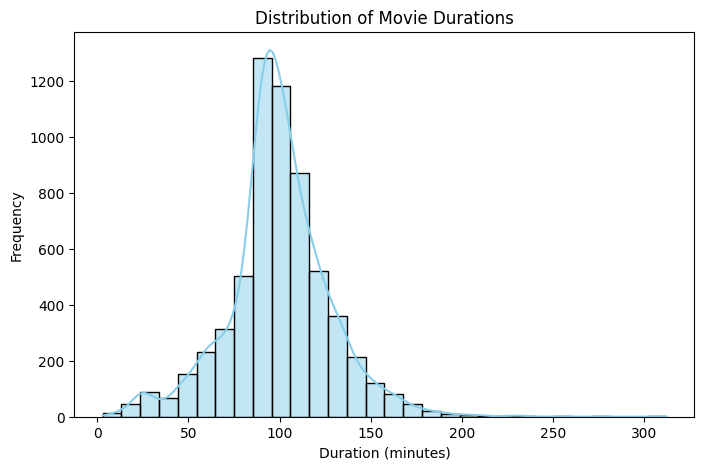

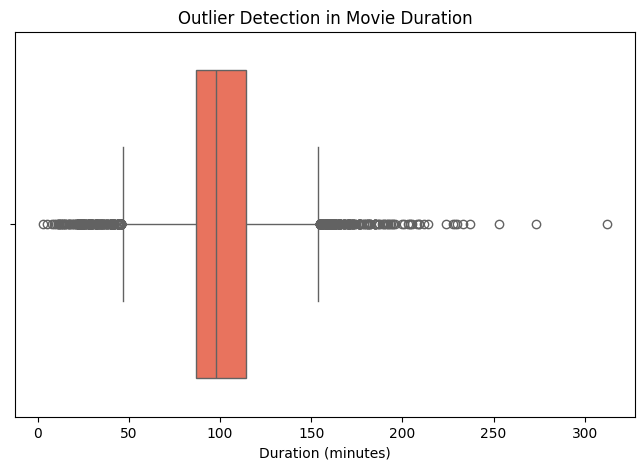

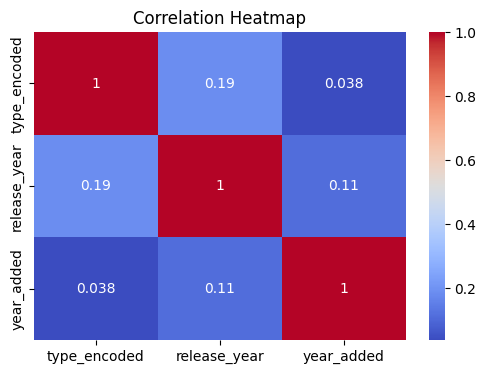

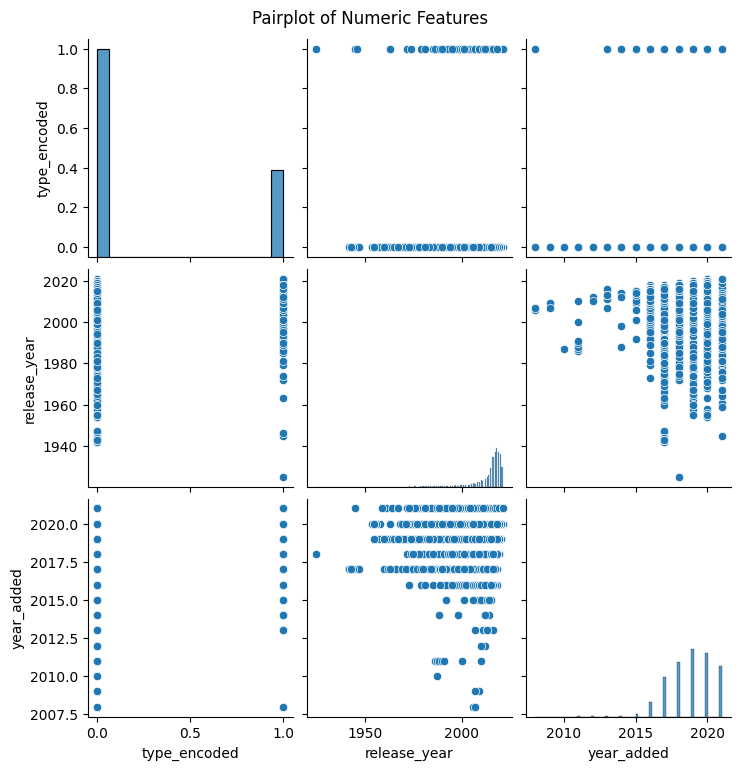

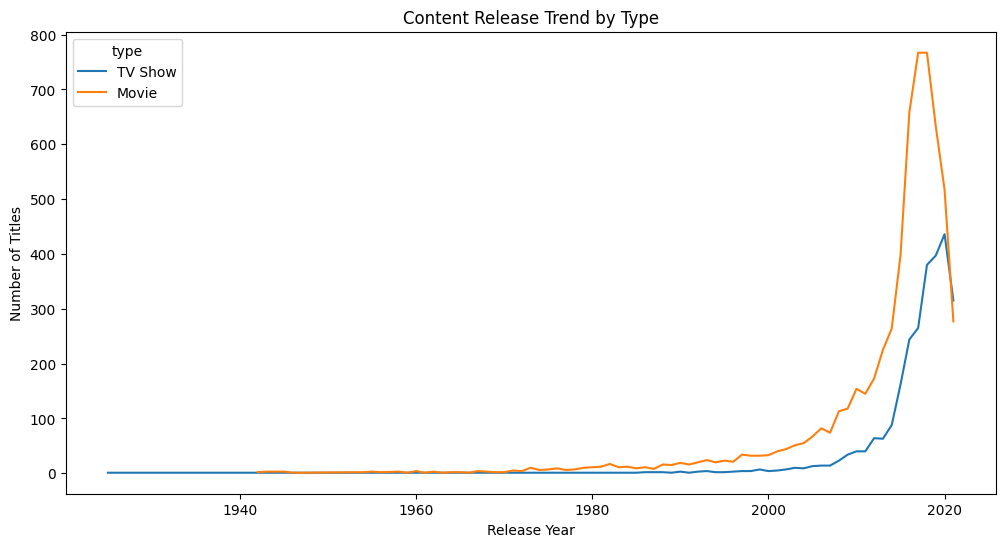

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load Dataset from GitHub
url = 'https://raw.githubusercontent.com/datasriram/task-1-netflix-cleaning/main/netflix_titles.csv'
df = pd.read_csv(url)

# Basic Info
print(df.shape)
print(df.columns)
df.info()
df.describe(include='all')

# Optional: Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Clean 'duration' for Movies
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_mins'] = movie_df['duration'].str.replace(' min', '').astype(float)

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(movie_df['duration_mins'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=movie_df['duration_mins'], color='tomato')
plt.title("Outlier Detection in Movie Duration")
plt.xlabel("Duration (minutes)")
plt.show()

# Correlation & Pairplot
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

correlation_data = df[['type_encoded', 'release_year', 'year_added']].dropna()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Optional Pairplot
sns.pairplot(correlation_data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# Trend Analysis
year_type = df.groupby(['release_year', 'type']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=year_type, x='release_year', y='count', hue='type')
plt.title("Content Release Trend by Type")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()
